# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from polylearn import PolynomialNetworkClassifier
from polylearn import FactorizationMachineClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from keras.callbacks import EarlyStopping
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from keras.utils import np_utils
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from keras.utils.vis_utils import plot_model
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'classification'

In [3]:
stacking = 'False'

In [4]:
data_size = 'small'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.11/dataset/iris.csv')

In [30]:
target_col = 'variety'

In [7]:
user_drop_cols = []

In [8]:
threshold_NaN = 0.5

In [9]:
threshold_cat = 5

In [10]:
threshold_Z = 3.0

#### Dataset copy

In [11]:
df_copy = df.copy()

### Dataset Information

In [12]:
df.shape

(150, 5)

#### Some records

In [13]:
display(df)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Dataframe structure

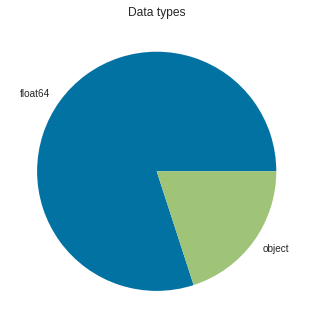

In [14]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [15]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### Which columns could be categorical ?

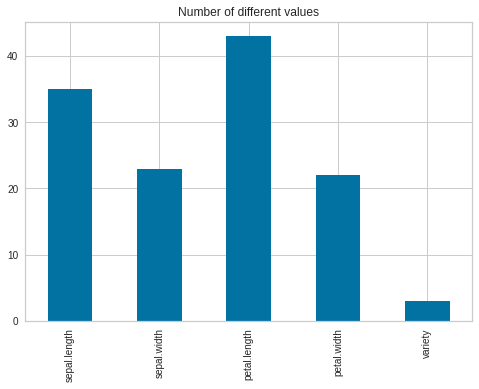

In [16]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [17]:
duplicates(df)

Number of rows before removing: 150
Number of duplicate rows: 1
Number of rows after removing: 149


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Drop user's columns:

In [18]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [19]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [20]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [21]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [22]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [23]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding numeric column: sepal.length
Encoding numeric column: sepal.width
Encoding numeric column: petal.length
Encoding numeric column: petal.width
Encoding object column: variety


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


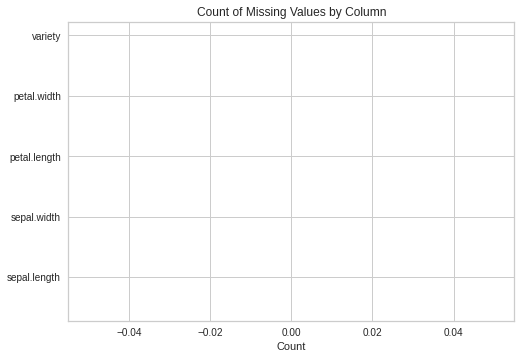

In [24]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [25]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [26]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.01MB
Memory usage after optimization is: 0.00MB
Decreased by 75.9%


##### Dataframe structure after compression

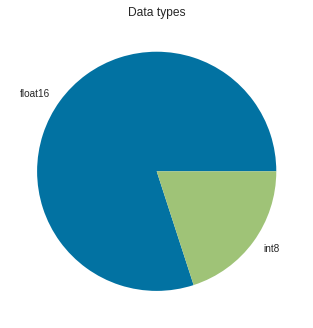

In [27]:
plot_dataframe_structure(df)

#### Outliers:

In [28]:
df = outliers(df, threshold_Z)

Using Z_score,  1  rows will be suppressed.


#### Splitting dataframe in features and targets

In [31]:
y = df[target_col]

In [32]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

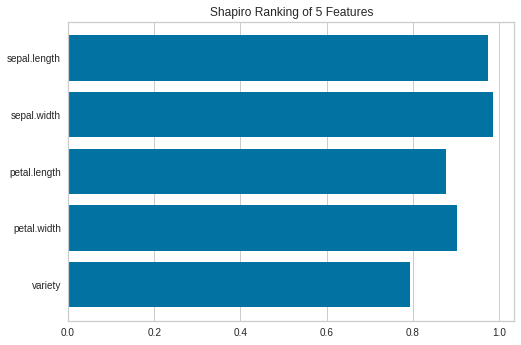

In [33]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

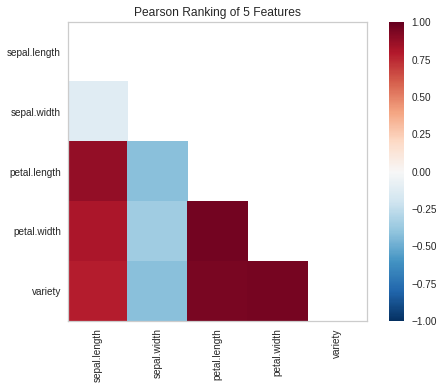

In [34]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

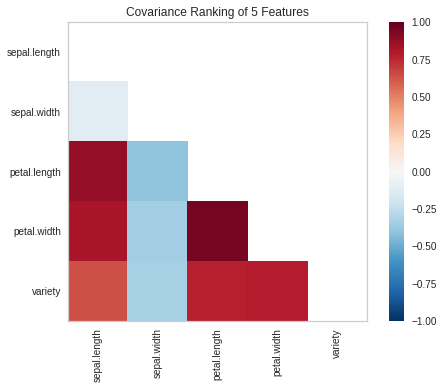

In [35]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

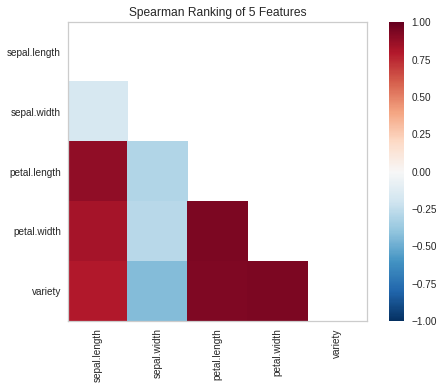

In [36]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

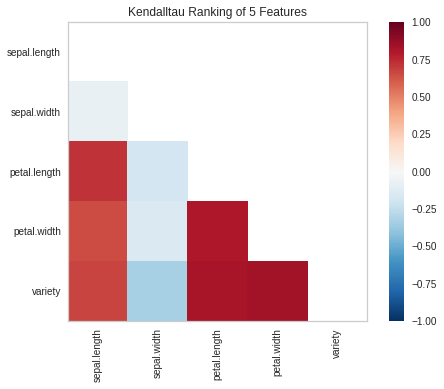

In [37]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

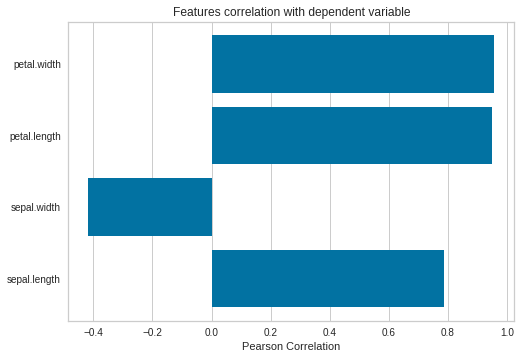

In [38]:
feature_correlation(X, y);

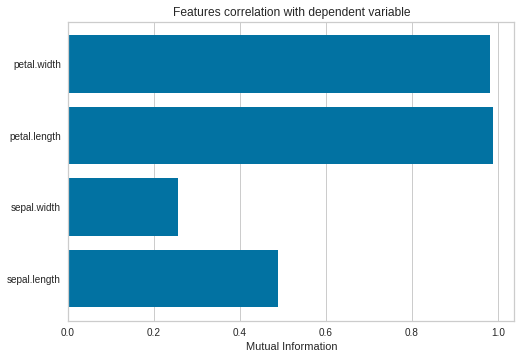

In [39]:
feature_correlation(X, y, method='mutual_info-classification');

#### Feature importance (a priori)

##### According to decision tree

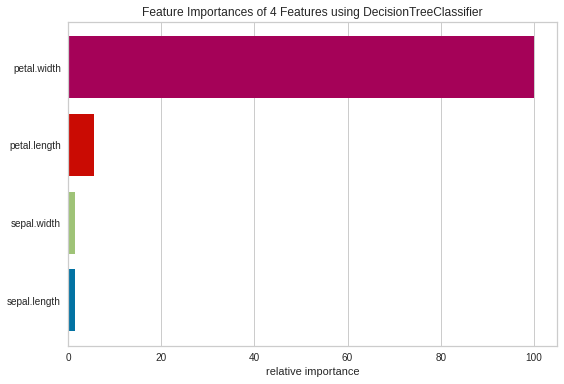

In [40]:
feature_importances(DecisionTreeClassifier(), X, y);

##### According to logistic regression

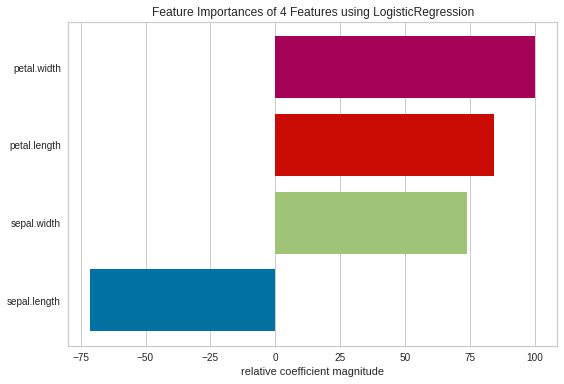

In [41]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

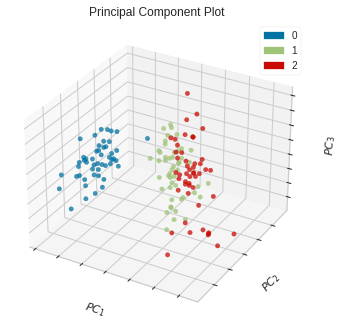

In [42]:
pca_decomposition(X, y.astype(int), projection=3);

#### Class balancing

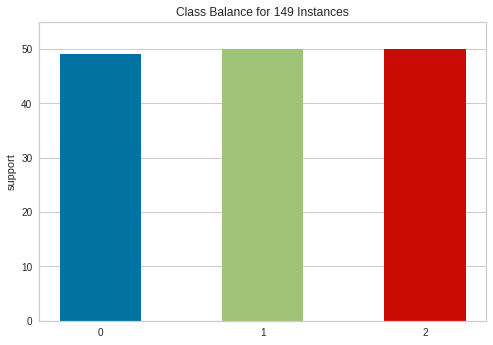

Entropy =  0.9999589074278229


In [43]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

## Splittings 

In [44]:
df = df_copy

#### Splitting dataframe in features and targets

In [45]:
y = df[target_col]

In [46]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [47]:
d_F=len(X.columns.tolist())

In [48]:
d_T=len(y.unique())

##### Encoding data

In [49]:
y = pd.get_dummies(df[target_col])

##### Splitting data in train and test sets 

In [50]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, stratify=None)

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [51]:
cat_selector = make_column_selector(dtype_include=object)

In [52]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [53]:
cat_tree_processor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [54]:
num_tree_processor = SimpleImputer(strategy='mean', add_indicator=True)

In [55]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

##### For models not based on tree

In [56]:
cat_ntree_processor = OneHotEncoder(handle_unknown='ignore')

In [57]:
num_ntree_processor = make_pipeline(StandardScaler(), SimpleImputer(strategy='mean', add_indicator=True))

In [58]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

##### Keras neural network definition

In [59]:
def K_Class(): 
    keras.backend.clear_session() 
#   neural network architecture: start 
    model = Sequential() 
    model.add(Dense(d_F + d_T + 2, input_dim=d_F, activation='relu')) 
    model.add(BatchNormalization()) 
#    model.add(LayerNormalization()) 
    model.add(Dense(d_T, activation='softmax')) 
#   neural network architecture: end   
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

##### Early Stopping

In [60]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

In [61]:
set_config(display='diagram') 
ntree_preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(add_indicator=True))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fad23861b20>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fad238f1dc0>)])

In [62]:
K_C = KerasBatchClassifier(K_Class,batch_size=64, epochs=2000, callbacks=[es],validation_data=(ntree_preprocessor.transform(X_test), y_test), verbose=1)

##### Pipeline

In [63]:
model = make_pipeline(ntree_preprocessor, K_C)

### Model fitting

In [64]:
%%time
set_config(display='diagram') 
model.fit(X_train, y_train)

Epoch 1/2000
2/2 [==============================] - 1s 391ms/step - loss: 1.5895 - accuracy: 0.1217 - val_loss: 1.1496 - val_accuracy: 0.4400
Epoch 2/2000
2/2 [==============================] - 0s 71ms/step - loss: 1.5291 - accuracy: 0.1663 - val_loss: 1.1407 - val_accuracy: 0.4600
Epoch 3/2000
2/2 [==============================] - 0s 104ms/step - loss: 1.5058 - accuracy: 0.1796 - val_loss: 1.1322 - val_accuracy: 0.4400
Epoch 4/2000
2/2 [==============================] - 0s 119ms/step - loss: 1.4683 - accuracy: 0.2196 - val_loss: 1.1237 - val_accuracy: 0.4600
Epoch 5/2000
2/2 [==============================] - 0s 106ms/step - loss: 1.4398 - accuracy: 0.2196 - val_loss: 1.1155 - val_accuracy: 0.4800
Epoch 6/2000
2/2 [==============================] - 0s 63ms/step - loss: 1.4222 - accuracy: 0.2233 - val_loss: 1.1072 - val_accuracy: 0.4400
Epoch 7/2000
2/2 [==============================] - 0s 71ms/step - loss: 1.3792 - accuracy: 0.2419 - val_loss: 1.0989 - val_accuracy: 0.4600
Epoch 8/2

Epoch 59/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.4368 - accuracy: 0.8983 - val_loss: 0.7597 - val_accuracy: 0.7000
Epoch 60/2000
2/2 [==============================] - 0s 81ms/step - loss: 0.4195 - accuracy: 0.9021 - val_loss: 0.7552 - val_accuracy: 0.7000
Epoch 61/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.4283 - accuracy: 0.9273 - val_loss: 0.7506 - val_accuracy: 0.7000
Epoch 62/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.4219 - accuracy: 0.9325 - val_loss: 0.7461 - val_accuracy: 0.7000
Epoch 63/2000
2/2 [==============================] - 0s 82ms/step - loss: 0.4198 - accuracy: 0.8969 - val_loss: 0.7416 - val_accuracy: 0.7000
Epoch 64/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.4099 - accuracy: 0.9102 - val_loss: 0.7372 - val_accuracy: 0.7000
Epoch 65/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.4038 - accuracy: 0.9035 - val_loss: 0.7328 - val_accuracy: 0.7200
Epoch 

2/2 [==============================] - 0s 72ms/step - loss: 0.2262 - accuracy: 0.9577 - val_loss: 0.5018 - val_accuracy: 0.8400
Epoch 117/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.2263 - accuracy: 0.9815 - val_loss: 0.4980 - val_accuracy: 0.8400
Epoch 118/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.2183 - accuracy: 0.9696 - val_loss: 0.4940 - val_accuracy: 0.8400
Epoch 119/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.2263 - accuracy: 0.9696 - val_loss: 0.4903 - val_accuracy: 0.8400
Epoch 120/2000
2/2 [==============================] - 0s 121ms/step - loss: 0.2379 - accuracy: 0.9696 - val_loss: 0.4864 - val_accuracy: 0.8400
Epoch 121/2000
2/2 [==============================] - 0s 81ms/step - loss: 0.2278 - accuracy: 0.9629 - val_loss: 0.4828 - val_accuracy: 0.8400
Epoch 122/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.2128 - accuracy: 0.9881 - val_loss: 0.4789 - val_accuracy: 0.8400
Epoch 123/200

2/2 [==============================] - 0s 67ms/step - loss: 0.1453 - accuracy: 1.0000 - val_loss: 0.3314 - val_accuracy: 0.8600
Epoch 174/2000
2/2 [==============================] - 0s 83ms/step - loss: 0.1514 - accuracy: 0.9933 - val_loss: 0.3290 - val_accuracy: 0.8600
Epoch 175/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.1476 - accuracy: 1.0000 - val_loss: 0.3270 - val_accuracy: 0.8800
Epoch 176/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.1620 - accuracy: 1.0000 - val_loss: 0.3248 - val_accuracy: 0.8800
Epoch 177/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.1495 - accuracy: 0.9881 - val_loss: 0.3227 - val_accuracy: 0.8800
Epoch 178/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.1328 - accuracy: 1.0000 - val_loss: 0.3206 - val_accuracy: 0.8800
Epoch 179/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.1336 - accuracy: 1.0000 - val_loss: 0.3183 - val_accuracy: 0.8800
Epoch 180/2000

2/2 [==============================] - 0s 93ms/step - loss: 0.1076 - accuracy: 1.0000 - val_loss: 0.2403 - val_accuracy: 0.9200
Epoch 231/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.1049 - accuracy: 1.0000 - val_loss: 0.2391 - val_accuracy: 0.9400
Epoch 232/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.1031 - accuracy: 1.0000 - val_loss: 0.2379 - val_accuracy: 0.9400
Epoch 233/2000
2/2 [==============================] - 0s 94ms/step - loss: 0.0938 - accuracy: 0.9933 - val_loss: 0.2366 - val_accuracy: 0.9400
Epoch 234/2000
2/2 [==============================] - 0s 125ms/step - loss: 0.1021 - accuracy: 1.0000 - val_loss: 0.2354 - val_accuracy: 0.9400
Epoch 235/2000
2/2 [==============================] - 0s 130ms/step - loss: 0.1025 - accuracy: 1.0000 - val_loss: 0.2341 - val_accuracy: 0.9400
Epoch 236/2000
2/2 [==============================] - 0s 148ms/step - loss: 0.0978 - accuracy: 1.0000 - val_loss: 0.2329 - val_accuracy: 0.9400
Epoch 237/2

2/2 [==============================] - 0s 126ms/step - loss: 0.0788 - accuracy: 1.0000 - val_loss: 0.1820 - val_accuracy: 0.9400
Epoch 288/2000
2/2 [==============================] - 0s 106ms/step - loss: 0.0770 - accuracy: 1.0000 - val_loss: 0.1804 - val_accuracy: 0.9400
Epoch 289/2000
2/2 [==============================] - 0s 91ms/step - loss: 0.0908 - accuracy: 0.9815 - val_loss: 0.1795 - val_accuracy: 0.9400
Epoch 290/2000
2/2 [==============================] - 0s 111ms/step - loss: 0.0766 - accuracy: 1.0000 - val_loss: 0.1785 - val_accuracy: 0.9400
Epoch 291/2000
2/2 [==============================] - 0s 121ms/step - loss: 0.0705 - accuracy: 1.0000 - val_loss: 0.1778 - val_accuracy: 0.9400
Epoch 292/2000
2/2 [==============================] - 0s 110ms/step - loss: 0.0746 - accuracy: 1.0000 - val_loss: 0.1770 - val_accuracy: 0.9400
Epoch 293/2000
2/2 [==============================] - 0s 99ms/step - loss: 0.0768 - accuracy: 1.0000 - val_loss: 0.1766 - val_accuracy: 0.9400
Epoch 294

2/2 [==============================] - 0s 73ms/step - loss: 0.0580 - accuracy: 1.0000 - val_loss: 0.1613 - val_accuracy: 0.9400
Epoch 345/2000
2/2 [==============================] - 0s 79ms/step - loss: 0.0718 - accuracy: 0.9933 - val_loss: 0.1605 - val_accuracy: 0.9400
Epoch 346/2000
2/2 [==============================] - 0s 142ms/step - loss: 0.0618 - accuracy: 1.0000 - val_loss: 0.1593 - val_accuracy: 0.9400
Epoch 347/2000
2/2 [==============================] - 0s 151ms/step - loss: 0.0658 - accuracy: 1.0000 - val_loss: 0.1582 - val_accuracy: 0.9400
Epoch 348/2000
2/2 [==============================] - 0s 134ms/step - loss: 0.0560 - accuracy: 0.9933 - val_loss: 0.1575 - val_accuracy: 0.9400
Epoch 349/2000
2/2 [==============================] - 0s 128ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 0.1570 - val_accuracy: 0.9400
Epoch 350/2000
2/2 [==============================] - 0s 118ms/step - loss: 0.0606 - accuracy: 1.0000 - val_loss: 0.1567 - val_accuracy: 0.9400
Epoch 351

2/2 [==============================] - 0s 72ms/step - loss: 0.0521 - accuracy: 1.0000 - val_loss: 0.1481 - val_accuracy: 0.9400
Epoch 402/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.1478 - val_accuracy: 0.9400
Epoch 403/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.0440 - accuracy: 1.0000 - val_loss: 0.1471 - val_accuracy: 0.9400
Epoch 404/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.0509 - accuracy: 0.9881 - val_loss: 0.1470 - val_accuracy: 0.9400
Epoch 405/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.0520 - accuracy: 1.0000 - val_loss: 0.1467 - val_accuracy: 0.9400
Epoch 406/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.0580 - accuracy: 0.9933 - val_loss: 0.1459 - val_accuracy: 0.9400
Epoch 407/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.0476 - accuracy: 1.0000 - val_loss: 0.1458 - val_accuracy: 0.9400
Epoch 408/2000

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(add_indicator=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fad23861b20>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fad238f1dc0>)])),
                ('kerasbatchclassifier',
                 KerasBatchClassifier(build_fn=<function K_Class at 0x7fad23ac64c0>))])

#### Keras neural network description

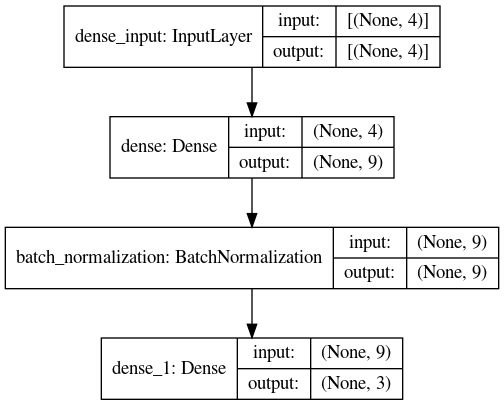

In [65]:
plot_model(K_Class(), show_shapes=True, show_layer_names=True)

### Model evaluation

#### Model scoring

In [66]:
print('Score on train set:', model.score(X_train, y_train.idxmax(axis=1)))

Score on train set: 1.0


In [67]:
print('Score on test set:', model.score(X_test, y_test.idxmax(axis=1)))

Score on test set: 0.94


##### Keras learning curve

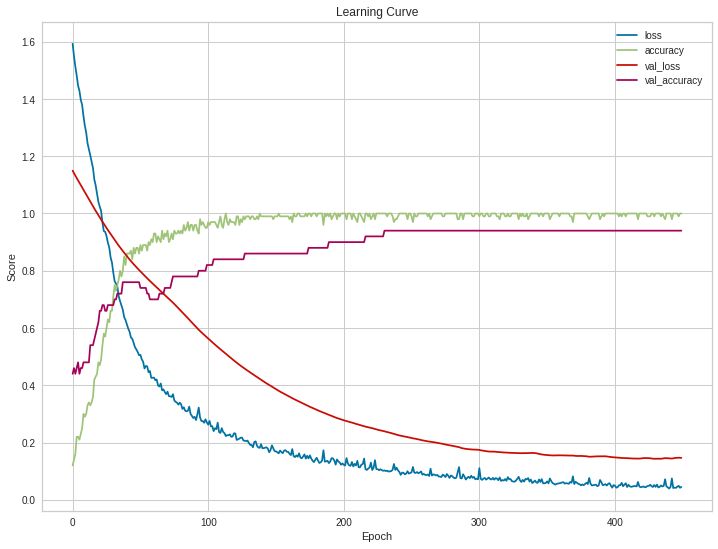

In [68]:
plot_history(model[1]._KerasBatchClassifier__history)

#### ROC/AUC

In [69]:
classes = y.columns

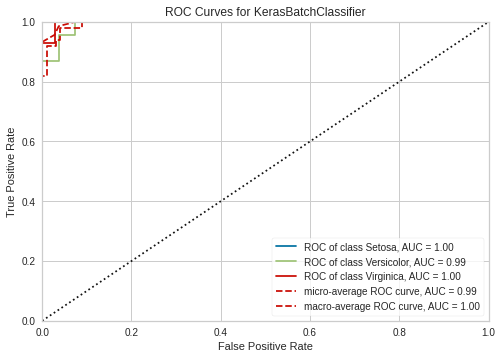

In [70]:
roc_auc(model, X_train, y_train.idxmax(axis=1), X_test = X_test, y_test = y_test.idxmax(axis=1), classes = classes);

#### Classification report

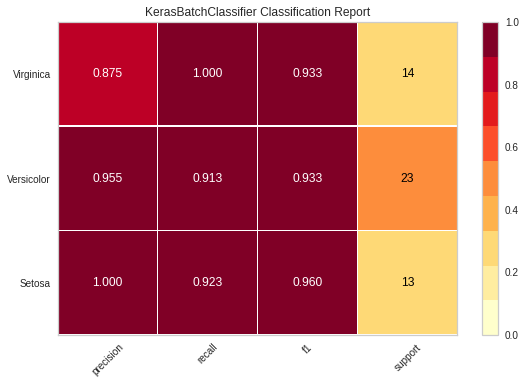

In [71]:
classification_report(model, X_train, y_train.idxmax(axis=1), X_test, y_test.idxmax(axis=1), classes=classes, support=True);

#### Confusion matrix

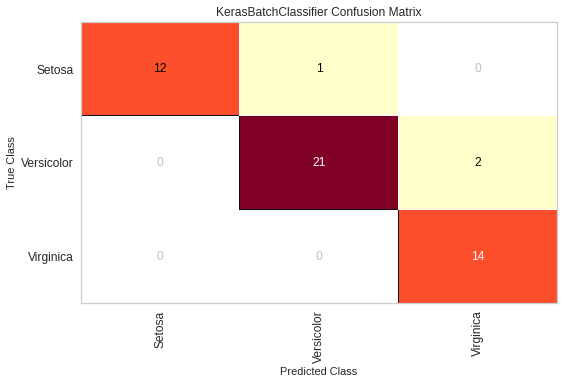

In [72]:
confusion_matrix(model, X_train, y_train.idxmax(axis=1), X_test, y_test.idxmax(axis=1), classes=classes);

#### Class prediction error

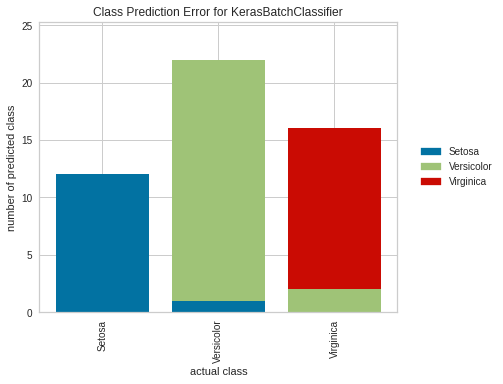

In [73]:
class_prediction_error(model, X_train, y_train.idxmax(axis=1), X_test, y_test.idxmax(axis=1), classes=classes);